In [1]:
using Plots
using Random

In [2]:
mutable struct track
    road::Array{Int64}
end

function track(n::Int64)
    track(zeros(n,n))
end

track

In [3]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [h+larg - j for j in 1:larg] #ones(larg)*(h+larg-i)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+larg-i)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos-n
    end
    
    r[pos]=h
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [h+larg - j for j in 1:larg] # ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=h
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = ones(larg)*h
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = ones(long)*h
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = ones(larg)*h
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = ones(long)*h
        end
        pos = pos-long
    end
    
    r[pos]=h
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = short!(tr,pos,dir,larg,h)
    (pos,dir) = short!(tr,pos,dir,larg,h+3)
    (pos,dir) = short!(tr,pos,dir,larg,h+6)
    (pos,dir) = short!(tr,pos,dir,larg,h+9)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+1)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+2)
end

h = 10
n = 100
R = track(n)
pos = 5550
larg = 6

R.road[5550 + n] = 10
dir = 22
right!(R,pos,dir,larg,h)

#plot(heatmap(R.road),size=(650,600))


(5551, 21)

62


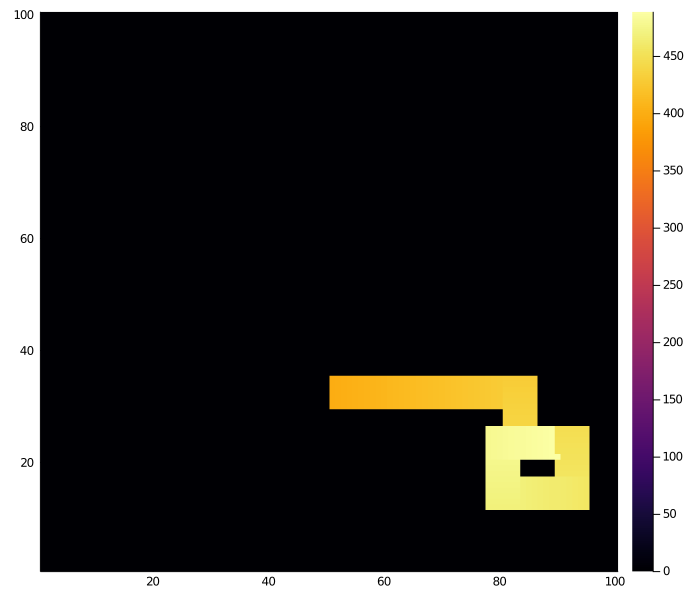

In [4]:
function generate(n::Int64)
    pos = 5030
    dir = 100
    turn1 = 0                # dernier virage
    turn2 = 0                # avant-dernier virage
    circuit = [1 for i in 1:10]   
    i = 1
    #while 5<pos%n<n-5 && 5<pos÷n<5 && i < 50
    while i<10
        x = rand()
        if x<1
            if turn1 == turn2 && turn2 != 0
                new = -turn1 + 7
            elseif rand()<0.5
                new = 3         # virage à droite
            else
                new = 4         # virage à gauche
            end
            turn2 = turn1
            turn1 = new
            circuit[i] = new
            circuit[i+1] = 1
            i = i +1
        else
            if rand()<1/3
                new = 2         # section longue
            else
                new = 1         # section courte
            end
            circuit[i] = new
        end
        i = i +1
    end
    circuit
end

function genall(n::Int64)
    Rgen = track(n)
    pos = 5030
    dir = 100
    turn1 = 0                # dernier virage
    turn2 = 0                # avant-dernier virage
    h = 400
    
    (pos,dir) = long!(Rgen,pos,dir,larg,h)         # départ
    h = h + 12
    i = 1
    
    println(pos÷n)
    
    while i < 20
        if 20<pos%n<n-20 && 20<pos÷n<n-20
            x = rand()
            if x<1/3
                if turn1 == turn2 && turn2 != 0
                    new = -turn1 + 7
                elseif rand()<0.5
                    (pos,dir) = right!(Rgen,pos,dir,larg,h)   # virage à droite
                    h = h+larg
                    new = 3
                else
                    (pos,dir) = left!(Rgen,pos,dir,larg,h)    # virage à gauche
                    h = h+larg
                    new = 4
                end
                turn2 = turn1
                turn1 = new

                (pos,dir) = short!(Rgen,pos,dir,larg,h)
                h = h + 3
                i = i + 1
            else
                if rand()<1/3
                    (pos,dir) = long!(Rgen,pos,dir,larg,h)         # section longue
                    h = h + 12
                else
                    (pos,dir) = short!(Rgen,pos,dir,larg,h)        # section courte
                    h = h + 3
                end
            end
        else
            if turn1 == turn2 && turn2 != 0
                    new = -turn1 + 7
            elseif rand()<0.5
                (pos,dir) = right!(Rgen,pos,dir,larg,h)   # virage à droite
                h = h+larg
                new = 3
            else
                (pos,dir) = left!(Rgen,pos,dir,larg,h)    # virage à gauche
                h = h+larg
                new = 4
            end
            turn2 = turn1
            turn1 = new

            (pos,dir) = short!(Rgen,pos,dir,larg,h)
            h = h + 3
            i = i + 1
        end
        i = i + 1
    end
    Rgen
end

Rgen = genall(n)

plot(heatmap(Rgen.road),size=(700,600))

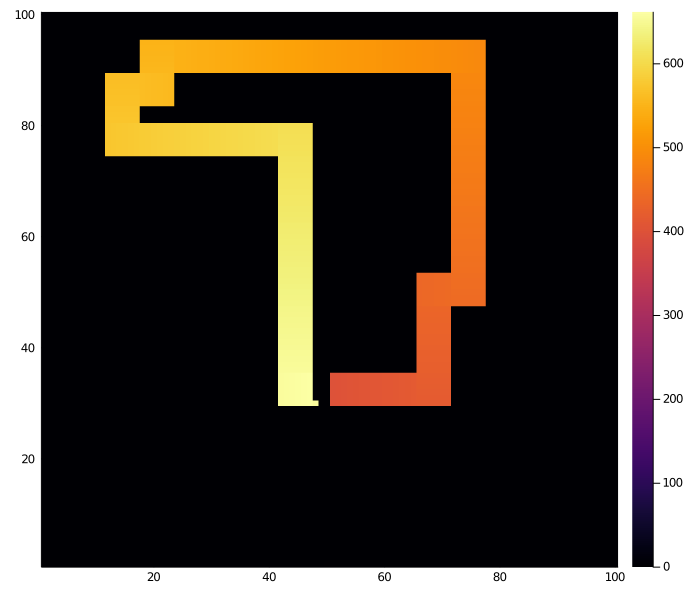

In [5]:
function build!(tr::track,L::Array{Int64})
    pos = 5030
    dir = 100
    tr.road[5001-n] = 1
    
    h = 400
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg,h)
            h = h + 3
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg,h)
            h = h + 12
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg,h)
            h = h+larg
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg,h)
            h = h+larg
        end
        h = h + 1
    end
end

R1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]


build!(R1,L)
plot(heatmap(R1.road),size=(700,600))

In [6]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
    vmin::Float64
end

function car(x::Float64,y::Float64)
    car(x,y,0,0,20,3,60,4)
end

car

In [7]:
function move!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            #delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>Car.vmin
            #delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        braqv = Car.braq*(1 + 20*Car.v/Car.vmax)
        Car.angle = Car.angle - delta/braqv
    end
    
    if input == 6 || input == 7 || input == 8
        braqv = Car.braq*(1 + 20*Car.v/Car.vmax)
        Car.angle = Car.angle + delta/braqv
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

function moveV!(Car::car,input::Int64,dt::Float64)
       
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>Car.vmin
            Car.v = Car.v - Car.a*dt
        end
    end
    
    Car.v
end

function moveA!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            #delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>Car.vmin
            #delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        braqv = Car.braq*(1 + 20*Car.v/Car.vmax)
        Car.angle = Car.angle - delta/braqv
    end
    
    if input == 6 || input == 7 || input == 8
        braqv = Car.braq*(1 + 20*Car.v/Car.vmax)
        Car.angle = Car.angle + delta/braqv
    end
    
    Car.angle
end


moveA! (generic function with 1 method)

See1 Calcule la distance d'une ligne avec un angle.
dx sert à régler la précision de la distance.

See reprend See1 pour donner la distance de plusieurs lignes par rapport à la voiture.

La fonction rend (dist gauche,dist devant,dist droite)

In [113]:
function see1(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track)
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    dist = (i-1)*dx
    #(X[1:i-1],Y[1:i-1])
end

function see3(Car::car,dx,tr::track)
    gauche = see1(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    devant = see1(Car.x,Car.y,Car.angle,dx,tr)
    droite = see1(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,devant,droite)
end

function see5(Car::car,dx,tr::track)
    gauche = see1(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end



function see1affichage(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track) #Retourne deux listes qui permettent de plot la vue de la voiture
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    (X[1:i-1],Y[1:i-1])
end

function see5affichage(Car::car,dx,tr::track)
    gauche = see1affichage(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1affichage(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1affichage(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1affichage(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1affichage(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end

see5affichage (generic function with 1 method)

In [115]:
see5(car(52.,35.),0.1,R1)

(0.6000000000000001, 0.9, 19.700000000000003, 7.9, 5.6000000000000005)

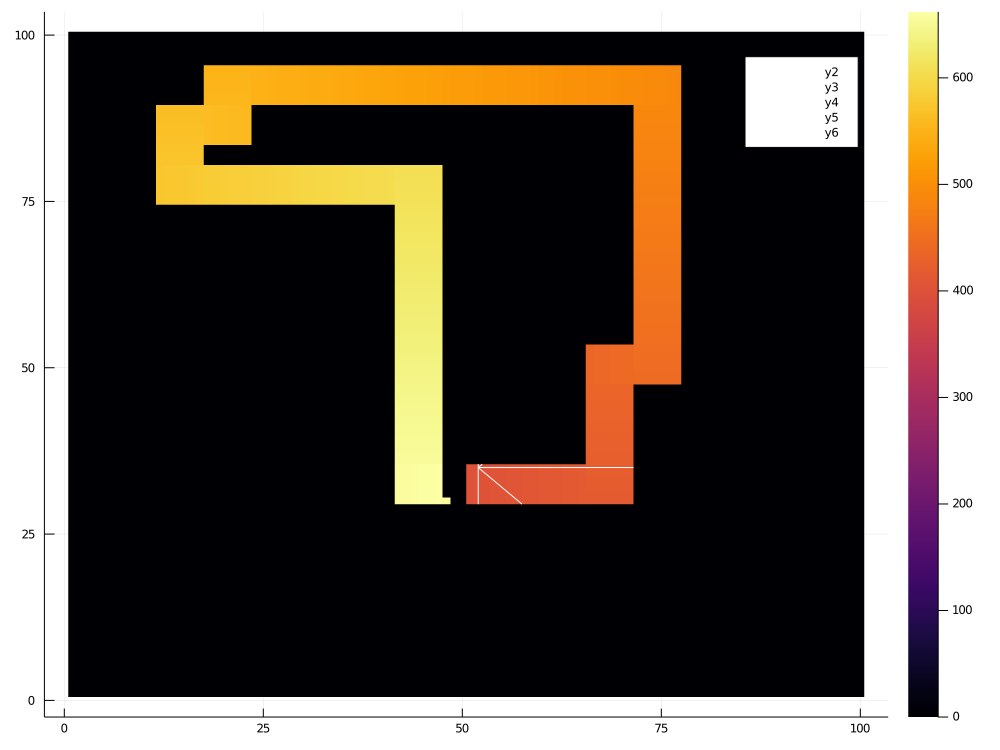

In [116]:
A = see5affichage(car(52.,35.),0.01,R1)

plot(heatmap(R1.road,size = (1000,750)))
plot!(A[1],color = "white")
plot!(A[2],color = "white")
plot!(A[3],color = "white")
plot!(A[4],color = "white")
plot!(A[5],color = "white")


In [30]:
function trajectoire(Car::car,L::Array{Int64},dt::Float64)
    X = zeros(length(L))
    Y = zeros(length(L))
    for i in eachindex(L)
        move!(Car,L[i],dt)
        X[i] = Car.x
        Y[i] = Car.y
    end
    (X,Y)
end

function vitesse(L::Array{Int64},dt::Float64)
    V = zeros(length(L))
    Car = car(0.0,0.0)
    for i in eachindex(L)
        V[i] = moveV!(Car,L[i],dt)
    end
    V
end

function angle(L::Array{Int64},dt::Float64)
    A = zeros(length(L))
    Car = car(0.0,0.0)
    for i in eachindex(L)
        A[i] = moveA!(Car,L[i],dt)
    end
    A
end

len = 1000
dt = 0.06
Car = car(0.0,0.0)
X = zeros(len)
Y = zeros(len);

In [11]:
mutable struct Ind
    genes::Array{Int64}
    fitness::Int64
    lim::Int64
end

function Ind(n::Int64,)
    genes = ones(n)
    Ind(ones(n),0,0)
end

Ind

In [12]:
function mutate!(ind::Ind;p = 2/ind.lim)
    for i in 5:ind.lim
        if rand()<p
            x = rand()
            if x<1/7
                ind.genes[i] = 2
            elseif 1/7<x<2/7
                ind.genes[i] = 4
            elseif 2/7<x<3/7
                ind.genes[i]=6
            elseif 3/7<x<4/7
                ind.genes[i]=8
            elseif 4/7<x<6/7
                ind.genes[i]=5
            else
                ind.genes[i] = 1
            end
        end
    end
end

mutate! (generic function with 1 method)

In [13]:
function evaluate!(ind::Ind,tr::track,CAR::car,dt::Float64)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    values = ones(nInd)
    i = 2
    while i < nInd && values[i-1]>0
        #println(values[i])
        x = Int(round(X[i]+52))
        y = Int(round(Y[i]+35))
        
        if 0<x<n && 0<y<n
            values[i] = tr.road[y,x]
            #println(values[i])
        end
        
        i = i+1
    end
    ind.lim = i
    ind.fitness = maximum(values)
end

function trajInd(ind::Ind,CAR::car,dt::Float64)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    values = ones(nInd)
    i = 1
    
    (X+ones(nInd)*52,Y+ones(nInd)*35)
end

function affichage(ind::Ind,tr::track,CAR::car,dt::Float64)
    tr2 = track(n)
    tr2.road = copy(tr.road)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    for i in 1:ind.lim
        x = Int(round(X[i]+52))
        y = Int(round(Y[i]+35))
        
        if 0<x<n && 0<y<n
            tr2.road[y,x] = 150
            #println(values[i])
        end
        
    end
    tr2.road
end


affichage (generic function with 1 method)

In [14]:
Car1 = car(0.0,0.0)
dt = 0.1
nInd = 200
first = Ind(nInd)
(X,Y) = trajectoire(Car1,first.genes,dt)
plot(scatter(X,Y))
#println(evaluate!(first,R1,Car1,dt))

child = Ind(nInd)
child.genes = copy(first.genes)

#plot(scatter(trajInd(first,car(0.0,0.0),dt)))

diag = zeros(9)
for i in first.genes
    diag[i] = diag[i]+1
end

#plot(diag, size = (200,150))
#plot(scatter(X,Y))
#println(first)

In [15]:
#R1 = Rgen

for i in 1:1000000
    
    child.genes = copy(first.genes)
    mutate!(child)
    evaluate!(child,R1,car(0.0,0.0),dt)
    if child.fitness >= first.fitness
        first.genes = copy(child.genes)
        evaluate!(first,R1,car(0.0,0.0),dt)
        #println("ok")
    end
    #println("C", child.fitness)
    #println(first.fitness)
end

first.fitness


630

630.0


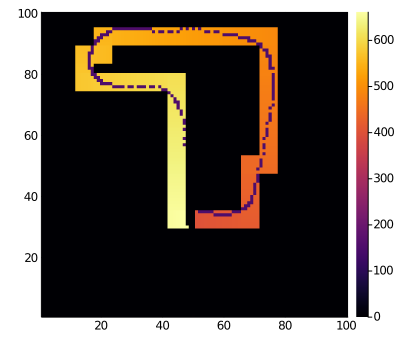

In [16]:
#plot(heatmap(R1.road), scatter(trajInd(child,car(0.0,0.0),dt)), size = (1000,400))
println(evaluate!(first,R1,car(0.0,0.0),dt))

plot(heatmap(affichage(first,R1,car(0.0,0.0),dt)),size = (400,350))

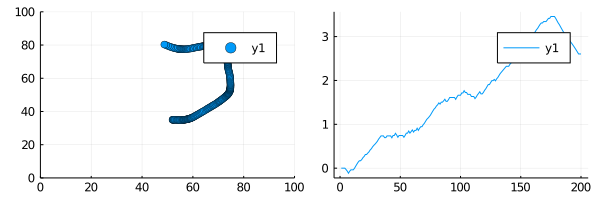

In [40]:
plot(scatter(trajInd(first,car(0.0,0.0),dt),xlim = (0,100), ylim = (0,100)),plot(angle(first.genes,dt),size = (600,200)))

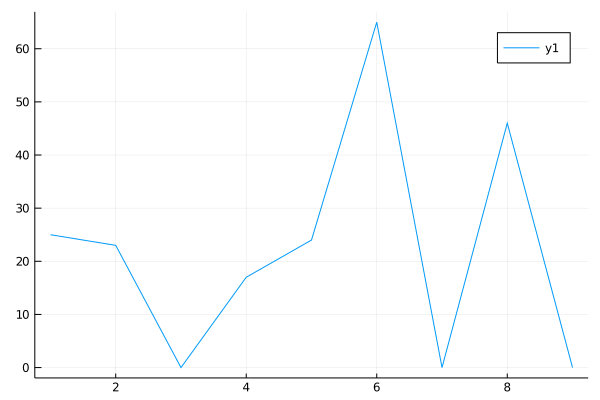

In [19]:
diag = zeros(9)
for i in first.genes
    diag[i] = diag[i]+1
end

plot(diag)